# IMPORT

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Reading CSV & Data exploration

In [2]:
df = pd.read_csv("csv_files\\regularite-mensuelle-tgv-aqst.csv",sep=";")

In [3]:
print("--------------Data Head--------------")
print(df.head())
print("\n")
print("--------------Data Description--------------")
print(df.describe())
print("\n")
print("--------------Data Types--------------")
print(df.dtypes)
print("\n")


--------------Data Head--------------
      date   service gare_depart         gare_arrivee  duree_moyenne  \
0  2018-01  National  PARIS LYON  AIX EN PROVENCE TGV            186   
1  2018-02  National  PARIS LYON  AIX EN PROVENCE TGV            186   
2  2018-03  National  PARIS LYON  AIX EN PROVENCE TGV            186   
3  2018-04  National  PARIS LYON  AIX EN PROVENCE TGV            187   
4  2018-05  National  PARIS LYON  AIX EN PROVENCE TGV            188   

   nb_train_prevu  nb_annulation  commentaire_annulation  \
0             424              0                     NaN   
1             398              3                     NaN   
2             430              9                     NaN   
3             461            134                     NaN   
4             457             76                     NaN   

   nb_train_depart_retard  retard_moyen_depart  ...  nb_train_retard_sup_15  \
0                      49            10.284354  ...                      44   
1         

In [4]:
print("--------------Identification missing values --------------")
print(df.isnull().sum())

--------------Identification missing values --------------
date                                       0
service                                    0
gare_depart                                0
gare_arrivee                               0
duree_moyenne                              0
nb_train_prevu                             0
nb_annulation                              0
commentaire_annulation                  8154
nb_train_depart_retard                     0
retard_moyen_depart                        0
retard_moyen_tous_trains_depart            0
commentaire_retards_depart              8154
nb_train_retard_arrivee                    0
retard_moyen_arrivee                       0
retard_moyen_tous_trains_arrivee           0
commentaires_retard_arrivee             7456
nb_train_retard_sup_15                     0
retard_moyen_trains_retard_sup15           0
nb_train_retard_sup_30                     0
nb_train_retard_sup_60                     0
prct_cause_externe                       

### Dropna or fillna ? / handle duplicates if there any ? 

In [5]:
#df = df.dropna()  
# OR
#df = df.fillna("value")  
#& OR 
#df = df.drop_duplicates()

In [6]:
df['date'] = pd.to_datetime(df['date'])

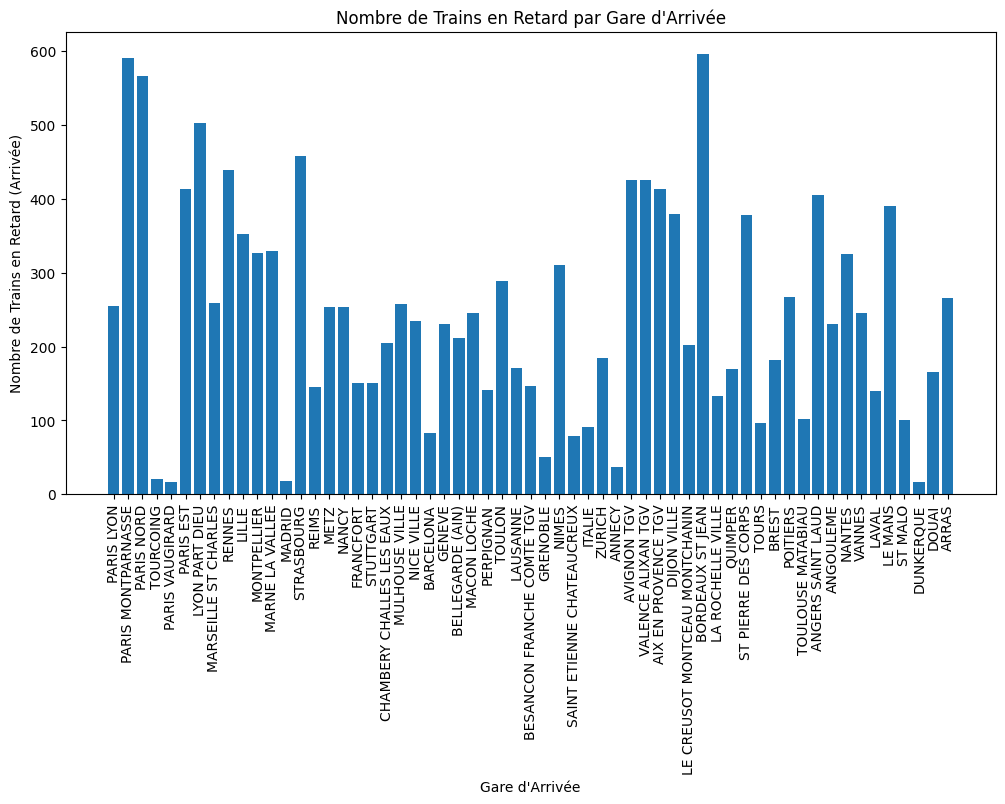

In [7]:


xpoints = df['gare_depart']
ypoints = df['nb_train_depart_retard']

plt.figure(figsize=(12, 6))  # Facultatif : définir la taille du graphique
plt.bar(xpoints, ypoints)  # Utiliser bar pour un graphique en barres
plt.xlabel('Gare d\'Arrivée')
plt.ylabel('Nombre de Trains en Retard (Arrivée)')
plt.title('Nombre de Trains en Retard par Gare d\'Arrivée')
plt.xticks(rotation=90)  # Pour faire pivoter les étiquettes de l'axe x (facultatif si les noms sont longs)

plt.show()






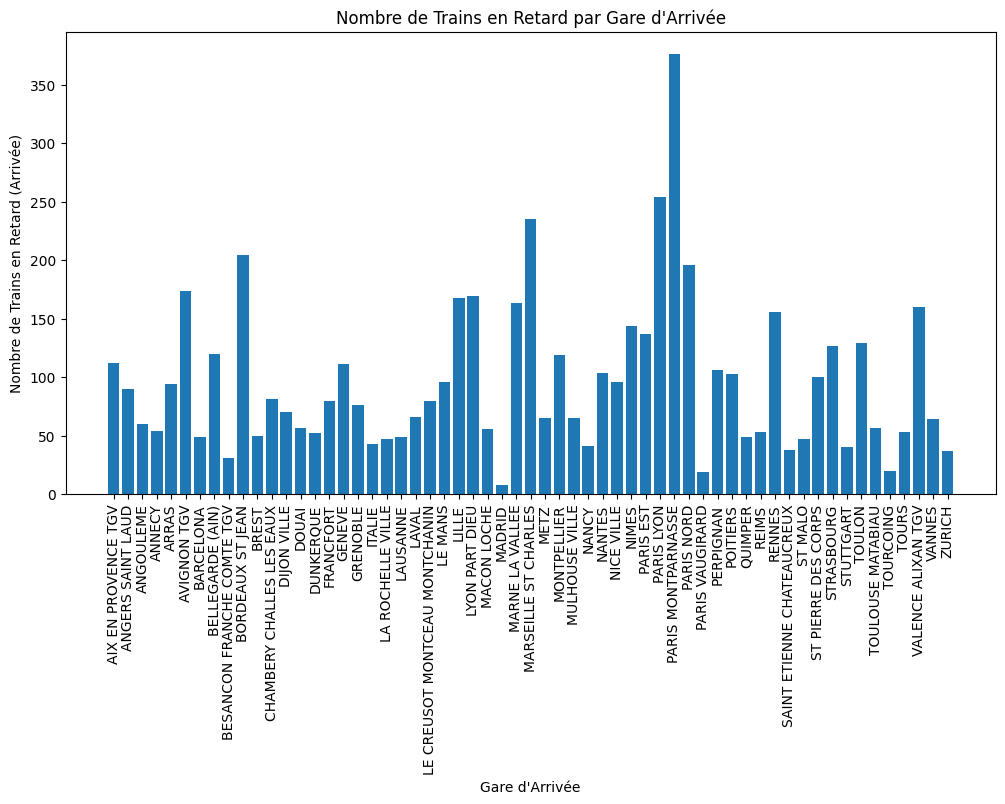

In [8]:
xpoints = df['gare_arrivee']
ypoints = df['nb_train_retard_arrivee']

plt.figure(figsize=(12, 6))  # Facultatif : définir la taille du graphique
plt.bar(xpoints, ypoints, color='orange')  # Utiliser bar pour un graphique en barres
plt.xlabel('Gare d\'Arrivée')
plt.ylabel('Nombre de Trains en Retard (Arrivée)')
plt.title('Nombre de Trains en Retard par Gare d\'Arrivée')
plt.xticks(rotation=90)  # Pour faire pivoter les étiquettes de l'axe x (facultatif si les noms sont longs)

plt.show()


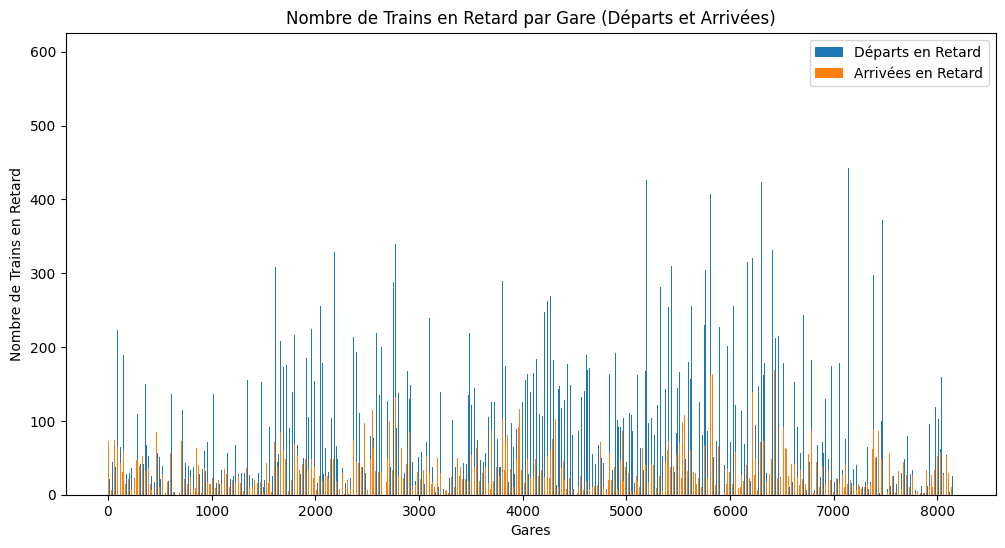

In [9]:


gares = df['gare_depart'] 

x = range(len(gares))
width = 0.4  # Largeur des barres

plt.figure(figsize=(12, 6))
bars1 = plt.bar(x, df['nb_train_depart_retard'], width=width, label='Départs en Retard')
bars2 = plt.bar(x, df['nb_train_retard_arrivee'], width=width, label='Arrivées en Retard', align='edge')

plt.xlabel('Gares')
plt.ylabel('Nombre de Trains en Retard')
plt.title('Nombre de Trains en Retard par Gare (Départs et Arrivées)')

plt.legend()



plt.show()


